<a href="https://colab.research.google.com/github/daryaAr/Amsterdam_real_estate_Aug2021/blob/main/Amsterdam__real_estate_districs_Statistical_insight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Loading data from [https://www.kaggle.com/](https://www.kaggle.com/)
This dataset is about housing prices in Amsterdam, Netherlands in August,2021

In [2]:
!mkdir -p ~/.kaggle
!cp /content/drive/My\ Drive/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
! kaggle datasets download -d thomasnibb/amsterdam-house-price-prediction

Dataset URL: https://www.kaggle.com/datasets/thomasnibb/amsterdam-house-price-prediction
License(s): CC0-1.0
amsterdam-house-price-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
!unzip amsterdam-house-price-prediction.zip -d /content

Archive:  amsterdam-house-price-prediction.zip
replace /content/HousingPrices-Amsterdam-August-2021.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# Importing the required libraries

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import geopandas as gpd
from shapely import wkt
from shapely.geometry import Point
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython.display import Image, display
import os
import plotly.io as pio

file_path = '/content/drive/MyDrive/Datasets/'
plot_path = '/content/drive/MyDrive/Datasets/Amsterdam_plots/'

# Importing the dataset and getting the basic insight about the rows, columns and shape and size of the dataset

In [7]:
# Importing:
housing_data = pd.read_csv('/content/HousingPrices-Amsterdam-August-2021.csv')
housing_data.head()

,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat
0,1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538


In [8]:
# Display basic information about the dataset:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  924 non-null    int64  
 1   Address     924 non-null    object 
 2   Zip         924 non-null    object 
 3   Price       920 non-null    float64
 4   Area        924 non-null    int64  
 5   Room        924 non-null    int64  
 6   Lon         924 non-null    float64
 7   Lat         924 non-null    float64
dtypes: float64(3), int64(3), object(2)
memory usage: 57.9+ KB


In [9]:
# removing the irrelevent column: "Unnamed: 0"
housing_data = housing_data.drop(columns = ['Unnamed: 0'])

 As we can see above, this dataset contains 924 housing entries with columns such as Address, Zip code (Zip), Price, Area, Room, Longitude (Lon), and Latitude (Lat). The data types include integers for Room, and Area,  floats for Price, Lon, and Lat; and objects (strings) for Address and Zip. Four entries have missing Price values.

In [10]:
# Getting the first statistical insight about the numerical features:
housing_data.describe()

,Price,Area,Room,Lon,Lat
count,9.200000e+02,924.000000,924.000000,924.000000,924.000000
mean,6.220654e+05,95.952381,3.571429,4.888605,52.363326
std,5.389942e+05,57.447436,1.592332,0.053140,0.024028
min,1.750000e+05,21.000000,1.000000,4.644819,52.291519
25%,3.500000e+05,60.750000,3.000000,4.855834,52.352077
50%,4.670000e+05,83.000000,3.000000,4.886818,52.364631
75%,7.000000e+05,113.000000,4.000000,4.922337,52.377598
max,5.950000e+06,623.000000,14.000000,5.029122,52.423805


 For this project I am also interested about the housing information in Amsterdam based on the districts (Stadsdeel). This dataset doesn't particularly provide the districts that the houses are, but it provides the information about the Longitude (Lon), and Latitude (Lat) of the housing enteries. Therefore, I am going to use these two columns to extract the districts name of the each housing entry. To do this, I am going to follow the below steps:

 1. Importing the dataset that includes the coordinates and geolocations  of the districts of city Amsterdam.
 2. Converting the Lon/Lat datas of the housing dataset to geometric objects.
 3. Meging the districts dataset to housing dataset based on the geometric relationship.

# Step 1: For this step I am going to use the data from an open and confirmed database like the database of Municipality of Amsterdam - Research, Information and Statistics.

 The dataset is downloaded from the linke below:
[https://maps.amsterdam.nl/open_geodata/?k=192](https://maps.amsterdam.nl/open_geodata/?k=192)

 This dataset includes District code,District, Area_m2, and POLYGON data. The Coordinates are in WGS84.

In [11]:
# Importing the data:
districts = pd.read_csv("/content/drive/MyDrive/Datasets/Amsterdam_District_Postalcode/INDELING_STADSDEEL.csv", delimiter=';')

# Convert POLYGON data to geometric objects for districts:
districts['geometry'] = districts['WKT_LNG_LAT'].apply(wkt.loads)

# Create GeoDataFrame:
districts_gdf = gpd.GeoDataFrame(districts, geometry='geometry')

# Set coordinate reference system (CRS) to WGS84:
districts_gdf.set_crs(epsg=4326, inplace=True)

,OBJECTNUMMER,Stadsdeelcode,Stadsdeel,Oppervlakte_m2,WKT_LNG_LAT,WKT_LAT_LNG,LNG,LAT,geometry
0,1,A,Centrum,8012895,"POLYGON((4.878166 52.378506,4.8781 52.3784,4.8...","POLYGON((52.378506 4.878166,52.3784 4.8781,52....",4.903707,52.373314,"POLYGON ((4.87817 52.37851, 4.87810 52.37840, ..."
1,2,M,Oost,30479187,"POLYGON((4.911799 52.33946,4.911175 52.339311,...","POLYGON((52.33946 4.911799,52.339311 4.911175,...",4.967143,52.350451,"POLYGON ((4.91180 52.33946, 4.91118 52.33931, ..."
2,3,B,Westpoort,28880754,"POLYGON((4.856085 52.416663,4.85548 52.416766,...","POLYGON((52.416663 4.856085,52.416766 4.85548,...",4.807315,52.411481,"POLYGON ((4.85609 52.41666, 4.85548 52.41677, ..."
3,4,F,Nieuw-West,37870831,"POLYGON((4.75749 52.396886,4.757599 52.396852,...","POLYGON((52.396886 4.75749,52.396852 4.757599,...",4.802671,52.363605,"POLYGON ((4.75749 52.39689, 4.75760 52.39685, ..."
4,5,T,Zuidoost,19809557,"POLYGON((4.998082 52.314036,4.997863 52.31398,...","POLYGON((52.314036 4.998082,52.31398 4.997863,...",4.971800,52.304668,"POLYGON ((4.99808 52.31404, 4.99786 52.31398, ..."
5,6,N,Noord,63585412,"POLYGON((4.856085 52.416663,4.85572 52.416324,...","POLYGON((52.416663 4.856085,52.416324 4.85572,...",4.967442,52.399454,"POLYGON ((4.85609 52.41666, 4.85572 52.41632, ..."
6,7,E,West,10589520,"POLYGON((4.836701 52.376353,4.835492 52.373452...","POLYGON((52.376353 4.836701,52.373452 4.835492...",4.865210,52.377894,"POLYGON ((4.83670 52.37635, 4.83549 52.37345, ..."
7,8,S,Weesp,26290251,"POLYGON((4.998082 52.314036,4.997944 52.313941...","POLYGON((52.314036 4.998082,52.313941 4.997944...",5.051907,52.304425,"POLYGON ((4.99808 52.31404, 4.99794 52.31394, ..."
8,9,K,Zuid,17208815,"POLYGON((4.817127 52.326928,4.817716 52.326441...","POLYGON((52.326928 4.817127,52.326441 4.817716...",4.866058,52.341736,"POLYGON ((4.81713 52.32693, 4.81772 52.32644, ..."


# Step 2: Converting the Lon/Lat datas of the housing dataset to geometric objects.

In [12]:
# Convert Lon/Lat data to geometric objects for housing:
housing_data['geometry'] = housing_data.apply(lambda row: Point(row['Lon'], row['Lat']), axis=1)

# Create GeoDataFrame:
housing_gdf = gpd.GeoDataFrame(housing_data, geometry='geometry')

# Set coordinate reference system (CRS) to WGS84:
housing_gdf.set_crs(epsg=4326, inplace=True)

,Address,Zip,Price,Area,Room,Lon,Lat,geometry
0,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157,POINT (4.90774 52.35616)
1,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586,POINT (4.85048 52.34859)
2,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782,POINT (4.94477 52.34378)
3,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712,POINT (4.78993 52.34371)
4,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538,POINT (4.90250 52.41054)
...,...,...,...,...,...,...,...,...
919,"Ringdijk, Amsterdam",1097 AE,750000.0,117,1,4.927757,52.354173,POINT (4.92776 52.35417)
920,"Kleine Beerstraat 31, Amsterdam",1033 CP,350000.0,72,3,4.890612,52.414587,POINT (4.89061 52.41459)
921,"Stuyvesantstraat 33 II, Amsterdam",1058 AK,350000.0,51,3,4.856935,52.363256,POINT (4.85694 52.36326)
922,"John Blankensteinstraat 51, Amsterdam",1095 MB,599000.0,113,4,4.965731,52.375268,POINT (4.96573 52.37527)


# Step3: Meging the districts dataset to housing dataset based on the geometric relationship.

 For this step I am going to perform a spatial join (left). Moreover, I am going to keep the relevent columns and ignore the unnecessory ones in the merged data to keep the data simpler.

In [13]:
# Perform a spatial join to combine the datasets based on the geometric relationship:
merged_gdf = gpd.sjoin(housing_gdf, districts_gdf, how='left', op='within')

# Extract only the necessary columns:
data = merged_gdf[['Address', 'Zip', 'Price', 'Area', 'Room', 'Lon', 'Lat', 'Stadsdeel']]

# Display the result:
data.head()

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


,Address,Zip,Price,Area,Room,Lon,Lat,Stadsdeel
0,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157,Oost
1,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586,Zuid
2,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782,Oost
3,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712,Nieuw-West
4,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538,Noord


# Data cleaning, preparing and analysing:

# Creating a new columns:

 Before going to the next step and doing more analysis and finding outliers, I will add a new column to the data. I believe that having the information about the ratio of the price to the area (price per sqm) in the context of real estate is very helpful. Using this ratio is a very effective method, especially in finding outliers, since it allows us to identify properties that are significantly overpriced or underpriced relative to their size. This ratio helps normalize prices across different property sizes, providing a more standardized way to detect anomalies.

In [15]:
# Calculate the price per square meter
data.loc[:, 'Price_per_sqm'] = data['Price'] / data['Area']
data.loc[:, 'Price_per_sqm'] = data['Price_per_sqm']
data.head()

,Address,Zip,Price,Area,Room,Lon,Lat,Stadsdeel,Price_per_sqm
0,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157,Oost,10703.125000
1,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586,Zuid,7916.666667
2,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782,Oost,7798.165138
3,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712,Nieuw-West,4531.250000
4,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538,Noord,5217.391304


In [16]:
# Check for the "Null" entries in the dataset:
print(data.isnull().sum())

Address          0
Zip              0
Price            4
Area             0
Room             0
Lon              0
Lat              0
Stadsdeel        2
Price_per_sqm    4
dtype: int64


### Since we don't have too many "Null" enteries, we can clean the data by simply removing the corrosponding row.

In [17]:
# Removing "na":
data = data.dropna()
print(data.isnull().sum())

Address          0
Zip              0
Price            0
Area             0
Room             0
Lon              0
Lat              0
Stadsdeel        0
Price_per_sqm    0
dtype: int64


# Plotting the data's histogram for Price, Area, Room, and Price_per_sqm

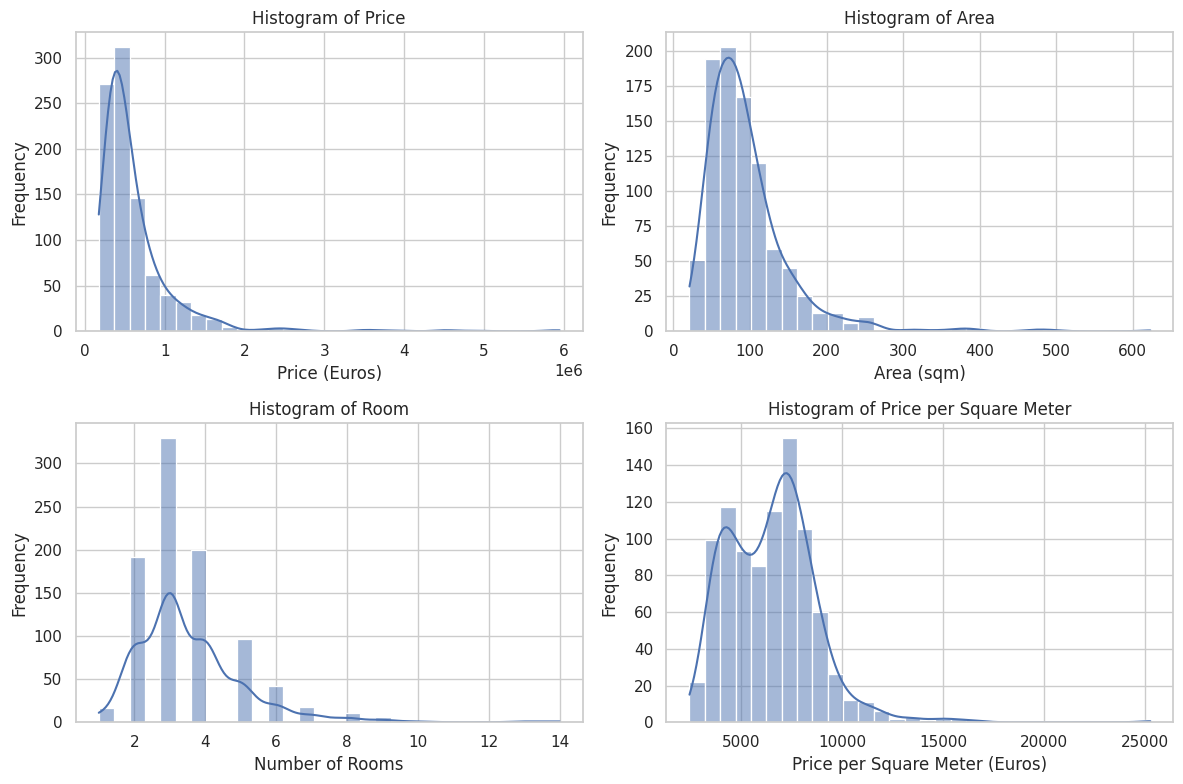

In [18]:
sns.set(style="whitegrid")
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Histogram for Price
sns.histplot(data['Price'], bins=30, kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Histogram of Price')
axs[0, 0].set_xlabel('Price (Euros)')
axs[0, 0].set_ylabel('Frequency')

# Histogram for Area
sns.histplot(data['Area'], bins=30, kde=True, ax=axs[0, 1])
axs[0, 1].set_title('Histogram of Area')
axs[0, 1].set_xlabel('Area (sqm)')
axs[0, 1].set_ylabel('Frequency')

# Histogram for Room
sns.histplot(data['Room'], bins=30, kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Histogram of Room')
axs[1, 0].set_xlabel('Number of Rooms')
axs[1, 0].set_ylabel('Frequency')

# Histogram for Price_per_sqm
sns.histplot(data['Price_per_sqm'], bins=30, kde=True, ax=axs[1, 1])
axs[1, 1].set_title('Histogram of Price per Square Meter')
axs[1, 1].set_xlabel('Price per Square Meter (Euros)')
axs[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# A brief summary of the histogrmas:

1. **Histogram of Price:**

- The distribution of housing prices is highly skewed to the right, indicating that most properties are priced below 1 million Euros. A significant tail extends to higher prices, reaching up to 6 million Euros. The kernel density estimate (KDE) line further highlights the skewness and the presence of a few high-priced outliers.

2. **Histogram of Area:**

- The area of the properties also shows a right-skewed distribution, with most properties having an area between 50 and 100 square meters. The KDE line shows a peak around 75 square meters and a gradual decline, with a few properties extending up to 600 square meters.

3. **Histogram of Room:**

- The number of rooms per property is roughly normally distributed, centered around 3-4 rooms. There is a noticeable peak at 3 rooms, and the distribution tapers off for properties with more than 5 rooms, extending up to 14 rooms. The KDE line indicates a single peak corresponding to the most common number of rooms.

4. **Histogram of Price per Square Meter:**

- The price per square meter distribution shows multiple peaks, indicating variability in property pricing. The main concentration is around 4000 to 7000 Euros per square meter. The KDE line highlights these peaks and the presence of some properties with significantly higher price per square meter, extending up to 25,000 Euros.


 These histograms provide a comprehensive overview of the housing data, illustrating the distribution of property prices, areas, number of rooms, and price per square meter. The skewness in prices and area indicates the presence of a few high-end properties, while the distribution of rooms shows that most properties have a moderate number of rooms. The variability in price per square meter suggests different pricing strategies that can be as a result of other factors like the neighborhood or property types within the dataset.

 Therefore, more visualizations especially based on districts can be helpful.

# Identifying the outliers:

 Before visualization, we need to handle the outliers. To do so, as I mentioned above, I will use the data from column "Price_per_sqm", instead of just "Price", since it provides a more standardized way to detect anomalies. I am going to use the 1.5*IQR method for finding the outliers.

In [19]:
# Identify outliers using the IQR method:
Q1 = data['Price_per_sqm'].quantile(0.25)
Q3 = data['Price_per_sqm'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers as points that fall outside of 1.5*IQR:
outliers = data[(data['Price_per_sqm'] < (Q1 - 1.5 * IQR)) | (data['Price_per_sqm'] > (Q3 + 1.5 * IQR))]

# Remove outliers from the dataset:
data_clean = data[~((data['Price_per_sqm'] < (Q1 - 1.5 * IQR)) | (data['Price_per_sqm'] > (Q3 + 1.5 * IQR)))]

data_clean.to_csv(file_path + 'data_clean.csv', index=False)

In [31]:
import kaleido
fig = make_subplots(rows=1, cols=2, subplot_titles=('Before', 'After'))

fig.add_trace(
    go.Box(y=data['Price_per_sqm'], name='Data', marker_color='blue'),
    row=1, col=1
)

fig.add_trace(
    go.Box(y=data_clean['Price_per_sqm'], name='Data Clean', marker_color='green'),
    row=1, col=2
)


fig.update_layout(
    title_text='Comparison of Price per Square Meter (Euros per sqm) before and after removing outliers',
    width=1000,
    height=600,
    showlegend=False
)
fig.show()
pio.write_html(fig, file=plot_path + 'comp_outlier_ratio.html', auto_open=True)

# More visualizations based on districts

In [33]:
# Defining a custom color scale to have a more clear and distinguish between the price_per_sqm range in different neighborhooods:
custom_color_scale = [
    [0, "blue"],
    [0.2, "purple"],
    [0.4, "yellow"],
    [0.6, "orange"],
    [0.8, "red"],
    [1, "green"]
]

# Creating the scatter mapbox plot with the custom color scale:
fig = px.scatter_mapbox(
    data_clean,
    lat='Lat',
    lon='Lon',
    size='Price_per_sqm',
    color='Price_per_sqm',
    hover_name='Address',
    hover_data={'Zip': True, 'Area': True, 'Room': True, 'Price': True, 'Stadsdeel': True},
    title='Interactive Scatter Plot of House Prices per sqm (Euros per sqm) in Amsterdam',
    labels={'Price_per_sqm': 'Price/Area Ratio'},
    template='plotly_white',
    zoom=10.5,
    color_continuous_scale=custom_color_scale
)

# Setting mapbox style and center it on Amsterdam, adjust layout to make the map square
fig.update_layout(
    mapbox_style="open-street-map",
    mapbox_center={"lat": 52.3676, "lon": 4.9041},
    width=1200,
    height=800
)
fig.show()
pio.write_html(fig, file=plot_path + 'scatter_map.html', auto_open=True)

# A brief summary of the Scatter Plot of House Prices per sqm in Amsterdam:

1. **Geographical Distribution:**

- Central Amsterdam, especially around the inner city and canal belt, shows a higher concentration of properties with mid to high prices per square meter, indicated by the prevalence of orange and red points.
- Outlying districts such as Nieuw-West, Noord, and Zuidoost exhibit more blue and purple points, indicating relatively lower prices per square meter.

2. **Density and Clustering:**

- The central and southeastern parts of Amsterdam have a dense clustering of property listings, suggesting higher demand and property availability in these regions.
- Areas like West, Oost, and parts of Centrum have a high density of points, reflecting a larger number of listings and potentially higher property values.



 This visualization provides a detailed and interactive overview of the housing market in Amsterdam, showcasing the distribution and pricing of properties across different neighborhoods. It highlights the varying affordability and density of housing, offering valuable insights for potential buyers, investors, and policymakers.

# Average area and Price/Area

In [34]:
# Calculating the average area for each district:
area_by_district = data_clean.groupby('Stadsdeel')['Area'].mean().reset_index()


fig = make_subplots(rows=1, cols=2, subplot_titles=('Box Plot of Price per sqm vs Districts', 'Average Area by Stadsdeel'))

# Creating the bar plot for average area:
bar_plot = px.bar(
    area_by_district,
    x='Stadsdeel',
    y='Area',
    color='Area',
    color_continuous_scale='Plasma'
).update_traces(showlegend=False)

# Creating the box plot for price per sqm:
box_plot = px.box(
    data_frame=data_clean,
    x='Stadsdeel',
    y='Price_per_sqm',
    color='Stadsdeel',
    template='plotly_white'
).update_traces(showlegend=False)


for trace in bar_plot['data']:
    fig.add_trace(trace, row=1, col=2)


for trace in box_plot['data']:
    fig.add_trace(trace, row=1, col=1)


fig.update_xaxes(categoryorder='total descending', row=1, col=2)

fig.update_layout(
    title_text='Average area of districts and Box Plot of price/sqm vs districts ',
    width=1400,
    height=700,
    showlegend=False
)

fig.show()
pio.write_html(fig, file=plot_path + 'comp_dist_area_ratio.html', auto_open=True)

# Insights:
These two plots together provide insights into the housing market in different districts, focusing on the average area and price per square meter (Price_per_sqm). By comparing these two plots we find out:

 1. **Higher Prices in Smaller Areas:**
- **Centrum:** Despite having one of the largest average areas, it also shows high prices per square meter. This indicates high property values in the central district, likely due to its central location and amenities.
- **Zuid:** High price per square meter suggests that this district is one of the most expensive areas in Amsterdam, reflecting its desirability.

2. **Affordable Districts with Smaller Areas:**

- **Zuidoost and Nieuw-West:** These districts have lower prices per square meter and also smaller average areas, indicating more affordable housing options.

3. **Balanced Districts:**

- **Noord and West:** These districts show a balance with moderate average areas and median prices per square meter. They offer a mix of affordability and space.

4. **Outliers:**

- Outliers in the price per square meter plot indicate that even in generally affordable districts, there are properties with exceptionally high prices.


By analyzing both plots together, we can conclude that while some districts like Zuid and Centrum offer large areas at high prices, others like Zuidoost and Nieuw-West provide more affordable housing with smaller areas. This combined insight helps in understanding the trade-offs between space and cost across different parts of Amsterdam, aiding potential buyers or investors in making informed decisions.

# Popularity and affordability:

In [35]:
# Calculating the popularity of districts:
district_counts = data_clean['Stadsdeel'].value_counts()

sorted_district_counts = district_counts.sort_values(ascending=False)

top_districts = sorted_district_counts.head(10).reset_index()
top_districts.columns = ['Stadsdeel', 'Count']

In [36]:
# Calculating the affordability of districts based on average price/sqm:
average_price_per_sqm = data_clean.groupby('Stadsdeel')['Price_per_sqm'].mean().reset_index()

average_price_per_sqm.columns = ['Stadsdeel', 'Avg_Price_per_sqm']
most_affordable_districts = average_price_per_sqm.sort_values(by='Avg_Price_per_sqm')

In [37]:
# Merging the popularity and affordability data
comparison_data = pd.merge(top_districts, average_price_per_sqm, on='Stadsdeel')


fig = make_subplots(rows=1, cols=2, subplot_titles=('Popularity of Districts', 'Affordability of Districts'))

# Bar plot for popularity of districts
fig.add_trace(
    go.Bar(
        x=comparison_data['Stadsdeel'],
        y=comparison_data['Count'],
        name='Popularity',
        marker_color='blue'
    ),
    row=1, col=1
)

# Bar plot for affordability of districts
fig.add_trace(
    go.Bar(
        x=comparison_data['Stadsdeel'],
        y=comparison_data['Avg_Price_per_sqm'],
        name='Affordability',
        marker_color='green'
    ),
    row=1, col=2
)


fig.update_xaxes(title_text='District', row=1, col=1)
fig.update_xaxes(title_text='District', row=1, col=2)
fig.update_yaxes(title_text='Count', row=1, col=1)
fig.update_yaxes(title_text='Average Price per sqm (Euros)', row=1, col=2)


fig.update_layout(
    title_text='Comparison of Popularity and Affordability of Districts',
    width=1200,
    height=600,
    showlegend=False
)

fig.show()
pio.write_html(fig, file=plot_path + 'pop_afford.html', auto_open=True)

# Insights:

1. **High Popularity and High Cost:**

- **West and Centrum:** These districts show a correlation between high popularity and high costs. Despite the higher prices per sqm, these areas remain in high demand.

2. **Balanced Districts:**

- **Oost and Noord:** These districts offer a balance between affordability and popularity. They have moderate prices per sqm and a reasonable number of listings.

3. **Affordable but Less Popular:**

- **Nieuw-West and Zuidoost:** These districts are more affordable but are less popular compared to other districts. They could be attractive for budget-conscious buyers.

4. **Least Popular and Affordable:**

- **Weesp:** This district, while being one of the most affordable, has the least number of listings, indicating lower demand or fewer available properties.
